In [1]:
from egoviz.cdss_utils.stats import get_descriptive_stats
import matplotlib.pyplot as plt

In [2]:
data = get_descriptive_stats(); data

{0: {'question': '* I predominantly deal with technical systems because I am forced to.',
  'mean': 4.2,
  'std': 0.9797958971132712,
  'median': 5.0,
  'iqr': 2.0,
  'min': 3,
  'max': 5},
 1: {'question': 'I enjoy spending time becoming acquainted with a new technical system.',
  'mean': 3.4,
  'std': 1.2000000000000002,
  'median': 4.0,
  'iqr': 2.0,
  'min': 2,
  'max': 5},
 2: {'question': '* It is enough for me that a technical system works; I do not care how or why.',
  'mean': 3.4,
  'std': 1.2000000000000002,
  'median': 4.0,
  'iqr': 2.0,
  'min': 2,
  'max': 5},
 3: {'question': 'I try to understand how a technical system exactly works.',
  'mean': 3.4,
  'std': 1.2000000000000002,
  'median': 4.0,
  'iqr': 2.0,
  'min': 2,
  'max': 5},
 4: {'question': '* It is enough for me to know the basic functions of a technical system.',
  'mean': 3.4,
  'std': 1.2000000000000002,
  'median': 4.0,
  'iqr': 2.0,
  'min': 2,
  'max': 5},
 5: {'question': 'I try to make full use of the c

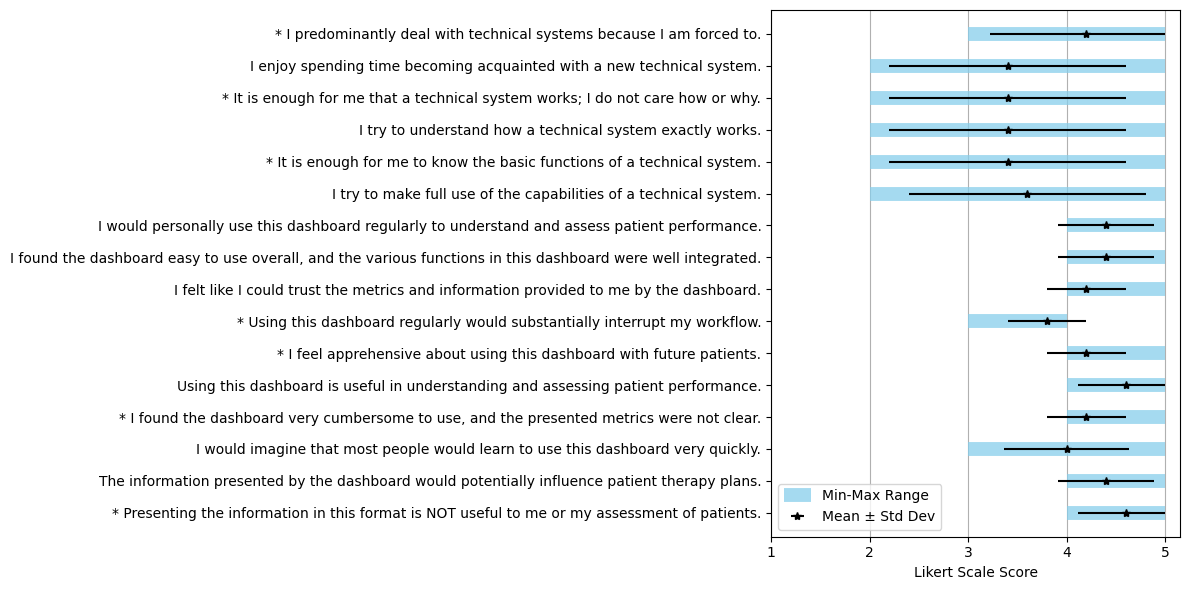

In [3]:
# Extracting data for plotting
questions = [data[key]['question'] for key in data][::-1]  # Reverse the order of questions
means = [data[key]['mean'] for key in data][::-1]
mins = [data[key]['min'] for key in data][::-1]
maxs = [data[key]['max'] for key in data][::-1]
stds = [data[key]['std'] for key in data][::-1]

# Plotting the horizontal bars with mean, min, max, and standard deviation
plt.figure(figsize=(12,6))

for i, question in enumerate(questions):
    plt.hlines(y=i, xmin=mins[i], xmax=maxs[i], color='skyblue', alpha=0.75, lw=10, label='Min-Max Range' if i == 0 else "")
    # Cap the error bars at 1 and 5
    lower_error = means[i] - stds[i]
    upper_error = means[i] + stds[i]
    lower_error = max(lower_error, 1)
    upper_error = min(upper_error, 5)
    plt.errorbar(means[i], i, xerr=[[means[i] - lower_error], [upper_error - means[i]]], fmt='*', color='black', label='Mean ± Std Dev' if i == 0 else "")

plt.yticks(range(len(questions)), questions)
plt.xticks(range(1, 6))  # Ensuring the x-axis shows 1-5
plt.xlabel('Likert Scale Score')
# plt.title('Survey Results with Min, Max, Mean, and Standard Deviation')
plt.grid(axis='x')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

T-01: 75.00
T-02: 97.50
T-03: 72.50
T-04: 85.00
T-05: 70.00
Mean: 80.00
Standard deviation: 10.12


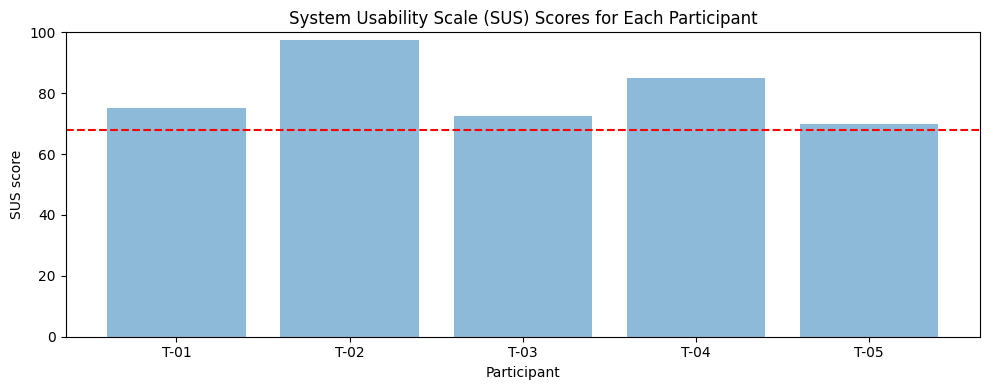

In [9]:
"""This module computes descriptive statistics for the system usability scale (SUS) questionnaire."""

import numpy as np  # type: ignore


def calculate_sus_scores(raw_scores):
    """
    Calculates the System Usability Scale (SUS) scores based on raw Likert scale scores.

    Args:
        raw_scores (numpy array): 2D array of raw Likert scale scores.
            Rows represent participants, and columns represent statements.

    Returns:
        numpy array: 1D array of SUS scores for each participant.
    """
    # Define the conversion factors for odd- and even-numbered statements
    odd_conversion = np.array([1, 3, 5, 7, 9])
    even_conversion = np.array([2, 4, 6, 8, 10])

    # Convert the raw scores to SUS scores
    sus_scores = np.zeros(raw_scores.shape[0])  # Initialize array to store SUS scores
    for i, scores in enumerate(raw_scores):
        odd_scores = scores[odd_conversion - 1] - 1
        even_scores = 5 - scores[even_conversion - 1]
        sus_scores[i] = (np.sum(odd_scores) + np.sum(even_scores)) * 2.5

    return sus_scores


# Participant responses to SUS statements (1 to 10)
sus_responses = np.array(
    [
        [4, 2, 4, 2, 4, 2, 4, 1, 4, 3],  # T-01
        [5, 1, 5, 2, 5, 1, 5, 1, 5, 1],  # T-02
        [2, 2, 4, 2, 4, 2, 5, 2, 4, 2],  # T-03
        [4, 2, 5, 2, 4, 1, 5, 1, 4, 2],  # T-04
        [3, 2, 4, 2, 4, 2, 4, 2, 3, 2],  # T-05
    ]
)

# Calculate SUS scores
sus_scores = calculate_sus_scores(sus_responses)

# Print SUS scores for each participant
for i, score in enumerate(sus_scores):
    print(f"T-0{i + 1}: {score:.2f}")

# Print mean and standard deviation of SUS scores
print(f"Mean: {np.mean(sus_scores):.2f}")
print(f"Standard deviation: {np.std(sus_scores):.2f}")

# Plot SUS scores on bar plot, add a horizontal line at 68
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1, 6), sus_scores, alpha=0.5, ecolor="black", capsize=10)
plt.axhline(y=68, color="red", linestyle="--")
plt.xticks(np.arange(1, 6), labels=["T-01", "T-02", "T-03", "T-04", "T-05"])
plt.xlabel("Participant")
plt.ylabel("SUS score")
plt.title("System Usability Scale (SUS) Scores for Each Participant")
plt.ylim(0, 100)
plt.tight_layout()


In [12]:
np.mean(sus_scores), np.std(sus_scores)

(80.0, 10.124228365658293)

In [14]:
def sus_ci(sus_scores: np.ndarray) -> tuple:
    """
    Calculate the 95% confidence interval for the mean SUS score.

    Args:
        mu (float): Mean SUS score.
        std (float): Standard deviation of SUS scores.

    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    # Calculate the standard error of the mean
    sem = np.std(sus_scores) / np.sqrt(len(sus_scores))

    # Calculate the margin of error (95% confidence) for 0.05 alpha and 4 dof
    margin_error = 2.78 * sem 

    # Calculate the confidence interval
    lower_bound = np.mean(sus_scores) - margin_error
    upper_bound = np.mean(sus_scores) + margin_error

    return lower_bound, upper_bound

sus_ci(sus_scores)

(67.413014657989, 92.586985342011)